In [13]:
library(magrittr)
library(lme4)
library(optimx)
library(dplyr)
library(readr)
library(jtools)
library(reticulate)
library(PerformanceAnalytics)
library(tidyverse)
library(ggcorrplot)
library(ggplot2)

In [14]:
my_data <- read.delim(file = '/kaggle/input/predicting-learning-outcomes/multiskill_converted_All_Data_1884_2013_0215_193821.txt')

In [15]:
my_data

Row,Anon.Student.Id,Problem.Hierarchy,Problem.Name,Problem.View,Step.Name,Step.Start.Time,First.Transaction.Time,Correct.Transaction.Time,Step.End.Time,⋯,KC.Rules.,Opportunity.Rules.,Predicted.Error.Rate.Rules.,KC.Single.KC.,Opportunity.Single.KC.,Predicted.Error.Rate.Single.KC.,KC.Unique.step.,Opportunity.Unique.step.,Predicted.Error.Rate.Unique.step.,Opportunity..KTracedSkills.
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<dbl>
1,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO1-MAP1,1,DoneButtonGoalNode,2011-09-09 11:51:47.0,2011-09-09 11:51:47.0,2011-09-09 11:51:47.0,2011-09-09 11:51:47.0,⋯,,,NA,Single-KC,1,NA,KC7334,1,NA,NA
2,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO1-MAP1,1,the-goalnode,2011-09-09 11:51:47.0,2011-09-09 11:51:47.0,,2011-09-09 11:51:47.0,⋯,,,NA,Single-KC,2,NA,KC6271,1,NA,NA
3,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO2-PAP1,1,DoneButtonGoalNode,2011-09-09 11:51:49.0,2011-09-09 11:51:52.0,2011-09-09 11:51:52.0,2011-09-09 11:51:52.0,⋯,,,NA,Single-KC,3,NA,KC7674,1,NA,NA
4,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO2-PAP1,1,the-goalnode,2011-09-09 11:51:49.0,2011-09-09 11:51:52.0,,2011-09-09 11:51:52.0,⋯,,,NA,Single-KC,4,NA,KC510,1,NA,NA
5,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO3-MAP2,1,DoneButtonGoalNode,2011-09-09 11:51:53.0,2011-09-09 11:51:56.0,2011-09-09 11:51:56.0,2011-09-09 11:51:56.0,⋯,,,NA,Single-KC,5,NA,KC1555,1,NA,NA
6,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO3-MAP2,1,the-goalnode,2011-09-09 11:51:53.0,2011-09-09 11:51:56.0,,2011-09-09 11:51:56.0,⋯,,,NA,Single-KC,6,NA,KC584,1,NA,NA
7,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO4-PAP2,1,DoneButtonGoalNode,2011-09-09 11:51:57.0,2011-09-09 11:52:01.0,2011-09-09 11:52:01.0,2011-09-09 11:52:01.0,⋯,,,NA,Single-KC,7,NA,KC6823,1,NA,NA
8,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO4-PAP2,1,the-goalnode,2011-09-09 11:51:57.0,2011-09-09 11:52:01.0,,2011-09-09 11:52:01.0,⋯,,,NA,Single-KC,8,NA,KC969,1,NA,NA
9,stu_0113m7,"Unit pre-survey, Section S1-pre-survey",AGO5-PAV1,1,DoneButtonGoalNode,2011-09-09 11:52:03.0,2011-09-09 11:52:06.0,2011-09-09 11:52:06.0,2011-09-09 11:52:06.0,⋯,,,NA,Single-KC,9,NA,KC3791,1,NA,NA


In [16]:
predWithOpp_new <- read.csv("/kaggle/input/predicting-learning-outcomes/predWithOpp_new.csv")

In [17]:
names(my_data)

[1] "Row"                                 "Anon.Student.Id"                    
 [3] "Problem.Hierarchy"                   "Problem.Name"                       
 [5] "Problem.View"                        "Step.Name"                          
 [7] "Step.Start.Time"                     "First.Transaction.Time"             
 [9] "Correct.Transaction.Time"            "Step.End.Time"                      
[11] "Step.Duration..sec."                 "Correct.Step.Duration..sec."        
[13] "Error.Step.Duration..sec."           "First.Attempt"                      
[15] "Incorrects"                          "Hints"                              
[17] "Corrects"                            "Condition"                          
[19] "KC.SubSkills."                       "Opportunity.SubSkills."             
[21] "Predicted.Error.Rate.SubSkills."     "KC.KTracedSkills."                  
[23] "Opportunity.KTracedSkills."          "Predicted.Error.Rate.KTracedSkills."
[25] "KC.Rules."                           "Opportunity.Rules."                 
[27] "Predicted.Error.Rate.Rules."         "KC.Single.KC."                      
[29] "Opportunity.Single.KC."              "Predicted.Error.Rate.Single.KC."    
[31] "KC.Unique.step."                     "Opportunity.Unique.step."           
[33] "Predicted.Error.Rate.Unique.step."   "Opportunity..KTracedSkills."

In [18]:
length(unique(my_data$Anon.Student.Id))

[1] 425

In [19]:
length(unique(my_data$Problem.Name))

[1] 30739

In [20]:
my_data$KC.KTracedSkills.[151]

[1] "Find Y, negative slope-1+Using large numbers-1+Using simple numbers-1"

In [21]:
length(unique(my_data$KC.KTracedSkills.))

[1] 1697

In [22]:
ds = my_data %>% 
    rename(individual = `Anon.Student.Id`,pid = `Problem.Name`, time = `First.Transaction.Time`,corrects = Corrects, incorrects = Incorrects, KC = `KC.KTracedSkills.`, opportunity = `Opportunity..KTracedSkills.`, response = `First.Attempt`) %>%
    arrange(individual, KC, time) %>%
    group_by(individual, KC) %>%
    mutate(
        prev_pid = lag(pid),
        prev_response = lag(response),
        opportunity_reverse = max(opportunity) - opportunity
      ) %>%
    ungroup() %>%
  mutate(
    response = ifelse(response == "correct", 1, 0),
    prev_response = ifelse(prev_response == "correct", 1, 0),
    opportunity0 = opportunity-1
  ) %>%
  set_tidy_names(syntactic = FALSE) %>%
  filter(!(is.na(KC) | KC == "" | KC=="0" | KC == 0 ))  # remove empty KC

In [23]:
sample_data <- ds

In [24]:
# max opportunity regarding each KC for each individual
ds_predict = sample_data %>%
  group_by(individual, KC) %>%
  slice(which.max(opportunity0))

In [25]:
# how many KCs a student have
summary(ds_predict %>%
  group_by(individual) %>%
  summarize(num_KCs = n_distinct(KC)))

  individual           num_KCs     
 Length:416         Min.   :  1.0  
 Class :character   1st Qu.:146.0  
 Mode  :character   Median :246.0  
                    Mean   :275.9  
                    3rd Qu.:375.0  
                    Max.   :922.0  

In [26]:
# total_opportunity for each individual
ds_predict2 = ds_predict %>% group_by(individual) %>% summarize(total_opportunity = sum(opportunity))

In [27]:
# summary(sample_data$opportunity0)

In [ ]:
# 1. Partition the Data by Opportunities
# Define opportunity groups
opportunity_groups <- c(0, 2, 4, 6, 8, 10, 14, 18, 25, 50, 100, 200, 300, 400, 500, 600, Inf)

# Create a new variable for opportunity group
ds <- sample_data %>%
  mutate(opportunity_group= cut(opportunity0, breaks = opportunity_groups, right = FALSE))

In [ ]:
# 2. Fit Separate Models for Each Opportunity Group
# Create an empty list to store the models and results
opportunity_models <- list()

# Fit separate models for each opportunity group
for (group in unique(ds$opportunity_group)) {
  sub_data <- filter(ds, opportunity_group == group)
    print(group)
    print(nrow(sub_data))
    model = sub_data %>% glm(response ~ opportunity0, data=., family=binomial())
    opportunity_models[[as.character(group)]] <- model
}


In [ ]:
# Create a data frame to store the results
slope_results <- data.frame(OpportunityGroup = character(),
                            KC_Slope = numeric(),
                            Individual_Slope = numeric())

# Extract slope estimates and store in the data frame
for (group in names(opportunity_models)) {
  model <- opportunity_models[[group]]
  slope <- coef(model)["opportunity0"]
  slope_results <- rbind(slope_results, data.frame(OpportunityGroup = group,
                                                   Slope = slope))
}

slope_results


In [ ]:
library(ggplot2)

# Create a bar plot
ggplot(slope_results, aes(x = factor(OpportunityGroup, levels = unique(slope_results$OpportunityGroup)), y = Slope)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Slopes for Different Opportunity Groups",
       x = "Opportunity Group",
       y = "Slope") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
# start.time <- Sys.time()

# model_iafm = sample_data %>%
#   glmer(response ~ opportunity0 + (opportunity0|KC) + (opportunity0|individual), 
#         data=., family=binomial(), nAGQ = 0 )

# # fitting time of model
# end.time <- Sys.time()
# round(end.time - start.time, 2)

In [28]:
model_iafm <- readRDS("/kaggle/input/predicting-learning-outcomes/model_iafm.rds")
summ(model_iafm)

MODEL INFO:
Observations: 1639826
Dependent Variable: response
Type: Mixed effects generalized linear regression
Error Distribution: binomial
Link function: logit 

MODEL FIT:
AIC = 1180967.10, BIC = 1181065.58
Pseudo-R² (fixed effects) = 0.33
Pseudo-R² (total) = 0.97 

FIXED EFFECTS:
------------------------------------------------
                     Est.   S.E.   z val.      p
------------------ ------ ------ -------- ------
(Intercept)          1.57   0.04    36.47   0.00
opportunity0         0.09   0.00    24.82   0.00
------------------------------------------------

RANDOM EFFECTS:
---------------------------------------
   Group       Parameter     Std. Dev. 
------------ -------------- -----------
     KC       (Intercept)      1.30    
     KC       opportunity0     0.11    
 individual   (Intercept)      0.54    
 individual   opportunity0     0.00    
---------------------------------------

Grouping variables:
------------------------------
   Group      # groups   ICC  


In [29]:
model_iafm_reverse <- readRDS("/kaggle/input/predicting-learning-outcomes/model_iafm_reverse.rds")
summ(model_iafm_reverse)

MODEL INFO:
Observations: 1639826
Dependent Variable: response
Type: Mixed effects generalized linear regression
Error Distribution: binomial
Link function: logit 

MODEL FIT:
AIC = 1160254.86, BIC = 1160353.34
Pseudo-R² (fixed effects) = 0.37
Pseudo-R² (total) = 1.00 

FIXED EFFECTS:
--------------------------------------------------------
                             Est.   S.E.   z val.      p
------------------------- ------- ------ -------- ------
(Intercept)                  2.47   0.05    53.44   0.00
opportunity_reverse         -0.27   0.01   -31.01   0.00
--------------------------------------------------------

RANDOM EFFECTS:
----------------------------------------------
   Group           Parameter        Std. Dev. 
------------ --------------------- -----------
     KC           (Intercept)         1.18    
     KC       opportunity_reverse     0.30    
 individual       (Intercept)         0.68    
 individual   opportunity_reverse     0.01    
--------------------------

In [ ]:
# saveRDS(model_iafm, file = "/kaggle/working/model_iafm.rds")

In [30]:
model_iafm_param <- ranef(model_iafm)
model_iafm_reverse_param <- ranef(model_iafm_reverse)

# Export the random effects to a CSV file
# write.csv(model_iafm_param, file = "/kaggle/working/model_iafm_param.csv")
# write.csv(model_iafm_reverse_param, file = "/kaggle/working/model_iafm_reverse_param.csv")

In [32]:
# join individual with corresponding init_iAFM
StudentInterceptsiAFM = data.frame(
  individual = row.names(ranef(model_iafm)$individual),
  int_iAFM = ranef(model_iafm)$individual[,1],
  int_iAFM_reverse = ranef(model_iafm_reverse)$individual[,1]
)
# StudentInterceptsiAFM = data.frame(
#   cbind(row.names(ranef(model_iafm)$individual), 
#         ranef(model_iafm)$individual[,1]) 
# )
# colnames(StudentInterceptsiAFM) = c("individual","int_iAFM")
StudentInterceptsiAFM$int_iAFM = as.numeric(StudentInterceptsiAFM$int_iAFM) + + as.numeric(coef(summary(model_iafm))[1])
StudentInterceptsiAFM$int_iAFM_reverse = as.numeric(StudentInterceptsiAFM$int_iAFM_reverse) + + as.numeric(coef(summary(model_iafm_reverse))[1])

In [33]:
StudentInterceptsiAFM

individual,int_iAFM,int_iAFM_reverse
<chr>,<dbl>,<dbl>
stu_0113m7,1.7070556,2.550169
stu_01n2uy,1.4049450,2.374259
stu_03nig7,1.5640231,2.452676
stu_05gygj,1.6731734,2.483500
stu_09idnd,1.6137653,2.484661
stu_0bztgj,1.1058427,2.102499
stu_0h52n5,1.5952662,2.404742
stu_0ktmj0,0.9756250,2.169622
stu_0kwlpu,1.1704697,2.238574


In [34]:
initial_data <- ds_predict
# Set all values in the "opportunity0" column to 0
initial_data$opportunity0 <- 0
initial_data$opportunity_reverse <- ds_predict$'opportunity0'

In [37]:
ds_predict$pred_iafm = predict(model_iafm,ds_predict,type="response",allow.new.levels=TRUE)
ds_predict$pred_iafm_reverse = predict(model_iafm_reverse,ds_predict,type="response",allow.new.levels=TRUE)
ds_predict$pred_initial = predict(model_iafm,initial_data,type="response",allow.new.levels=TRUE)
ds_predict$pred_initial_reverse = predict(model_iafm_reverse, initial_data, type="response",allow.new.levels=TRUE)

ds_predict$learning_gain = ds_predict$pred_iafm - ds_predict$pred_initial
ds_predict$learning_gain_reverse = ds_predict$pred_iafm_reverse - ds_predict$pred_initial_reverse

In [38]:
ds_predict[, c("pred_iafm", "pred_iafm_reverse", "pred_initial", "pred_initial_reverse", "learning_gain", "learning_gain_reverse")]

pred_iafm,pred_iafm_reverse,pred_initial,pred_initial_reverse,learning_gain,learning_gain_reverse
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9632611,0.9721463,0.9523439,0.9382555,0.010917149,0.0338908512
0.9468993,0.9617695,0.9276039,0.8998552,0.019295358,0.0619142915
0.9497030,0.9638363,0.9314545,0.9061191,0.018248507,0.0577172144
0.9748115,0.9860500,0.9117248,0.7115381,0.063086771,0.2745118793
0.9254436,0.9487628,0.8955104,0.9052670,0.029933154,0.0434958585
0.6980338,0.8713658,0.6313975,0.5052162,0.066636340,0.3661496017
0.8937585,0.9240621,0.8769942,0.9196199,0.016764369,0.0044421385
0.9153783,0.9085491,0.9174144,0.9079389,-0.002036072,0.0006102382
0.9071306,0.9160416,0.8842837,0.9095754,0.022846891,0.0064661409


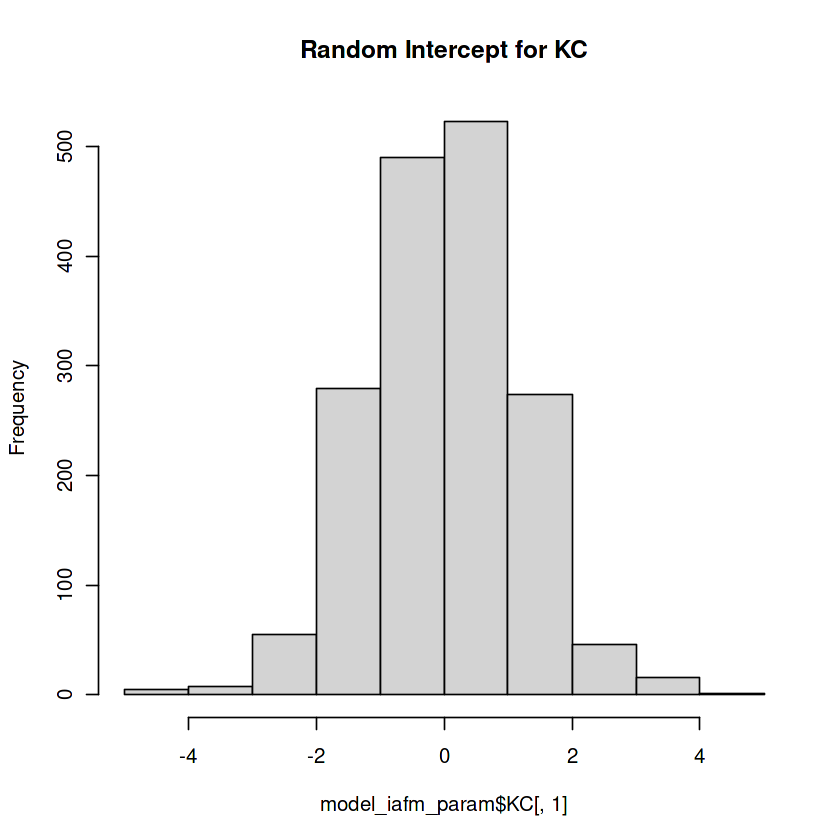

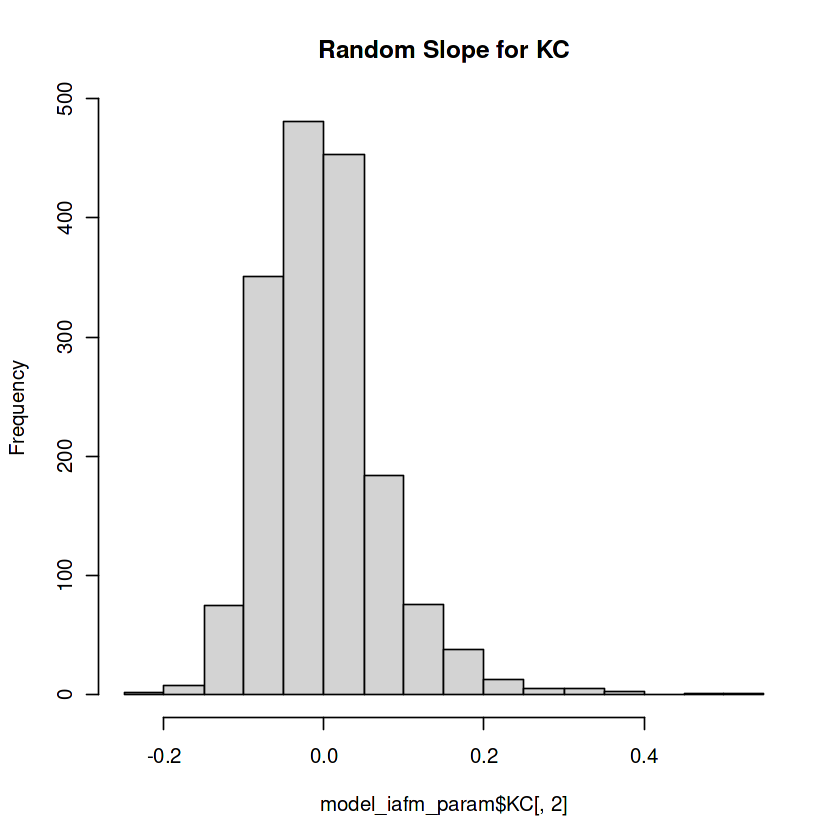

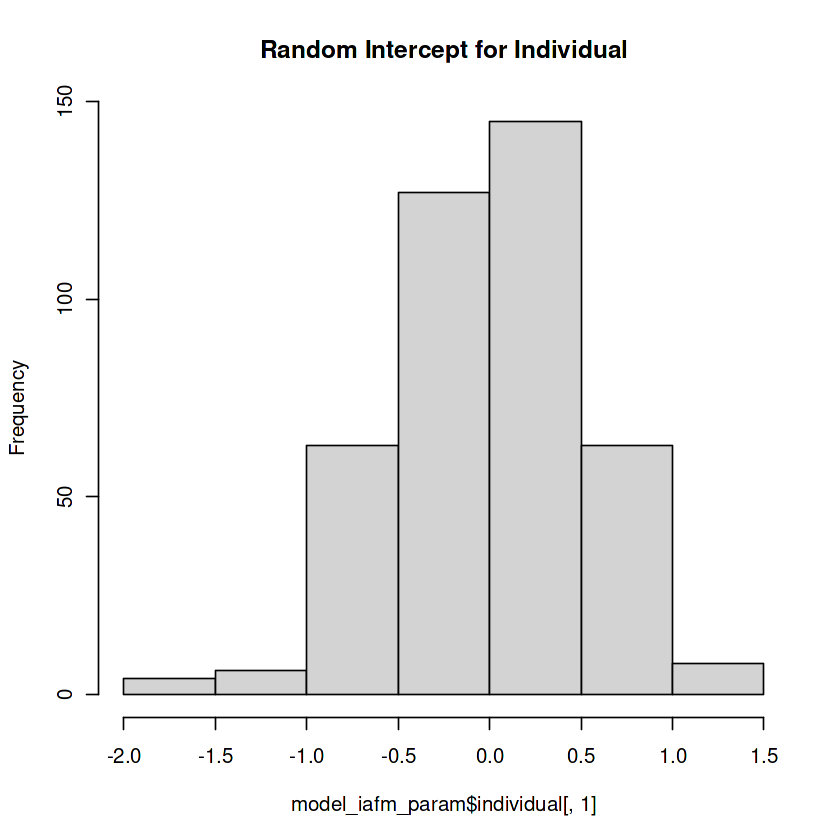

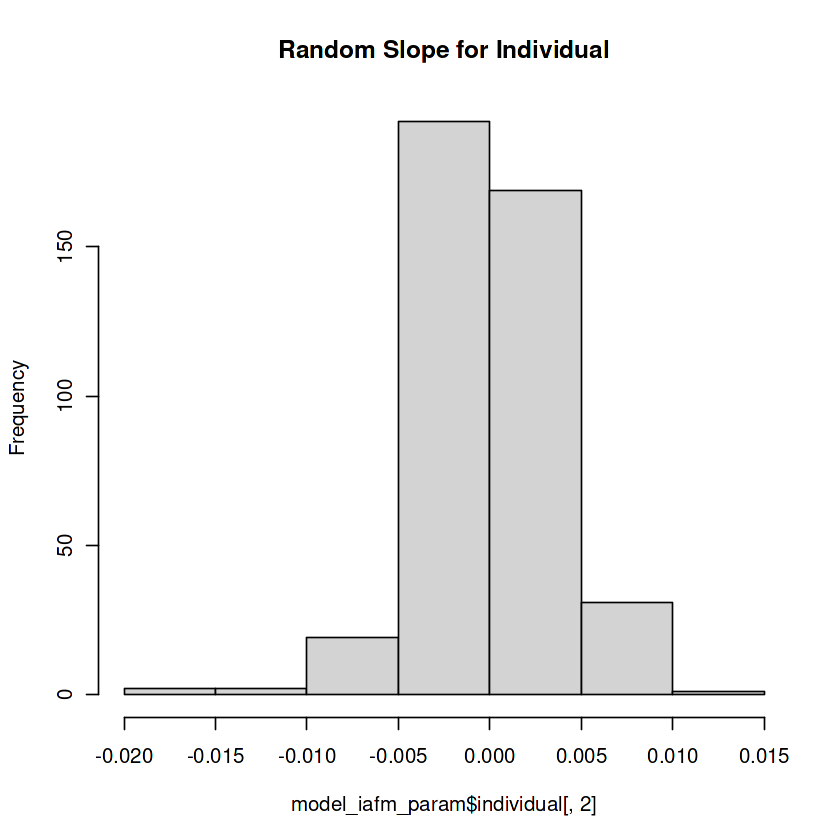

In [40]:
# Distribution of random intercepts for KC
hist(model_iafm_param$KC[, 1], main="Random Intercept for KC")

# Distribution of random slopes for KC
hist(model_iafm_param$KC[, 2], main="Random Slope for KC")

# Distribution of random intercepts for individual
hist(model_iafm_param$individual[, 1], main="Random Intercept for Individual")

# Distribution of random slopes for individual
hist(model_iafm_param$individual[, 2], main="Random Slope for Individual")


In [41]:
# Correlation between random intercepts and slopes for KC
cor(model_iafm_param$KC[, 1], model_iafm_param$KC[, 2])

# Correlation between random intercepts and slopes for individual
cor(model_iafm_param$individual[, 1], model_iafm_param$individual[, 2])

[1] -0.2185757

[1] -0.2341893

In [42]:
# Correlation between random intercepts and slopes for KC
cor(model_iafm_reverse_param$KC[, 1], model_iafm_reverse_param$KC[, 2])

# Correlation between random intercepts and slopes for individual
cor(model_iafm_reverse_param$individual[, 1], model_iafm_reverse_param$individual[, 2])

[1] -0.0008365435

[1] -0.5425526

In [43]:
# predicted correct probability for each student across all questions
PredictedScores = ds_predict %>% 
  group_by(individual) %>%
  summarise(
    PredAvgiAFM = mean(pred_iafm),
    PredAvgiAFMReverse = mean(pred_iafm_reverse),
    LearningGain = mean(learning_gain),
    LearningGainReverse = mean(learning_gain_reverse),
  )

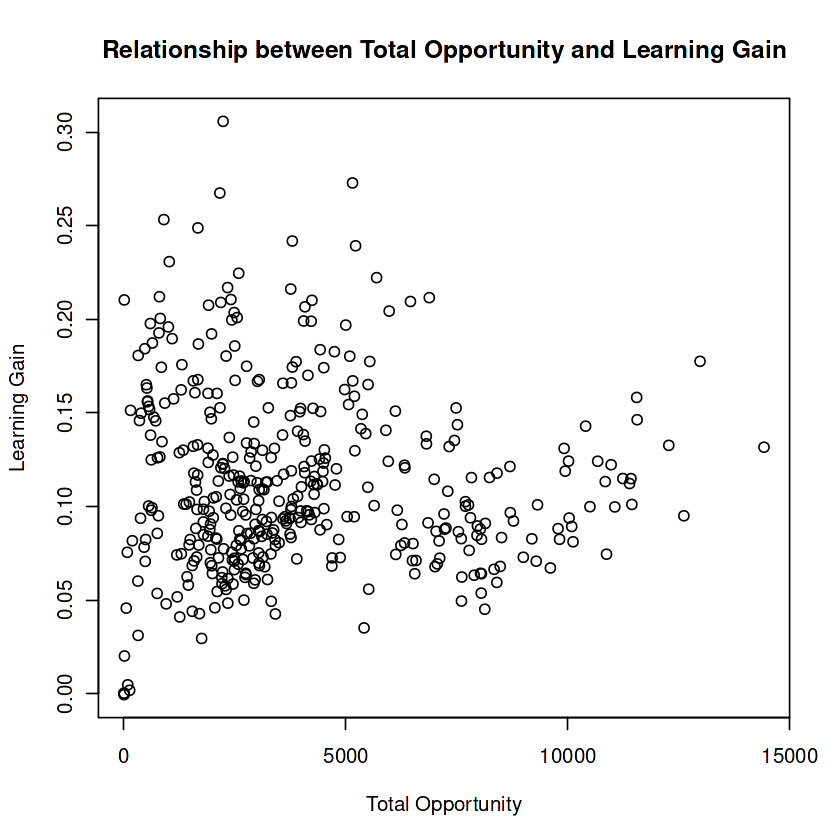

In [44]:
joined_data <- inner_join(PredictedScores, ds_predict2, by = "individual")
# Scatterplot
plot(joined_data$total_opportunity, joined_data$LearningGainReverse, 
     xlab = "Total Opportunity", ylab = "Learning Gain", main = "Relationship between Total Opportunity and Learning Gain")


Call:
lm(formula = LearningGain ~ total_opportunity, data = joined_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.061390 -0.018191 -0.006493  0.012063  0.180094 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.139e-02  2.477e-03  24.781   <2e-16 ***
total_opportunity -4.606e-07  5.092e-07  -0.905    0.366    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02962 on 414 degrees of freedom
Multiple R-squared:  0.001973,	Adjusted R-squared:  -0.0004379 
F-statistic: 0.8184 on 1 and 414 DF,  p-value: 0.3662


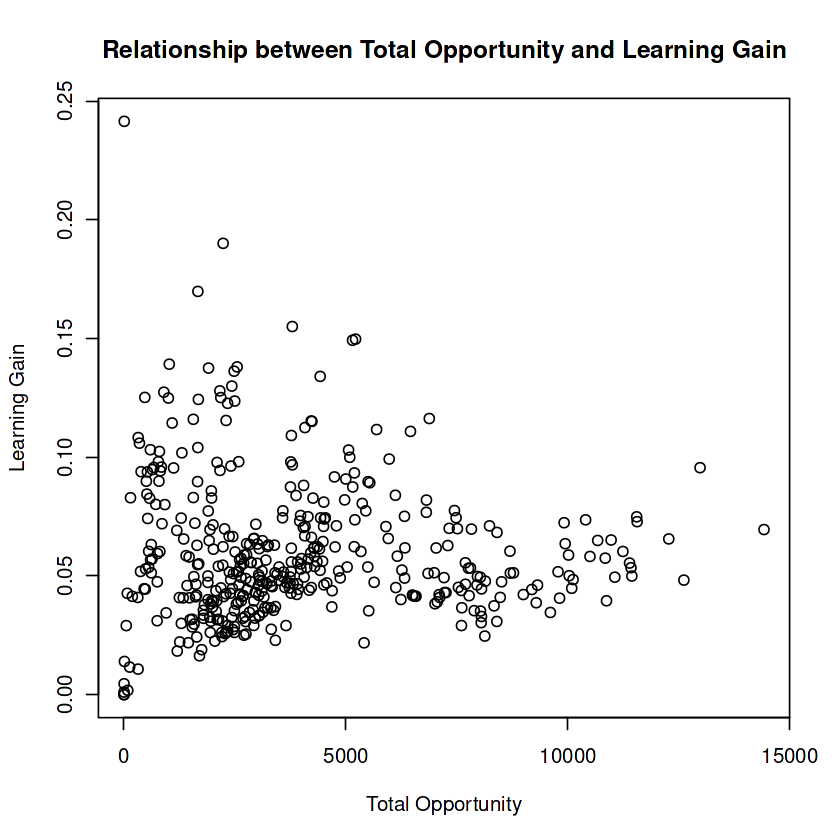

In [45]:
joined_data <- inner_join(PredictedScores, ds_predict2, by = "individual")
# Scatterplot
plot(joined_data$total_opportunity, joined_data$LearningGain, 
     xlab = "Total Opportunity", ylab = "Learning Gain", main = "Relationship between Total Opportunity and Learning Gain")

# Linear regression model
lm_model <- lm(LearningGain ~ total_opportunity, data = joined_data)

# Summary of the linear regression
summary(lm_model)


Call:
lm(formula = LearningGain ~ total_opportunity, data = joined_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.060269 -0.019408 -0.007344  0.012210  0.181213 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.027e-02  3.990e-03  15.105   <2e-16 ***
total_opportunity -2.242e-07  1.432e-06  -0.157    0.876    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03178 on 302 degrees of freedom
Multiple R-squared:  8.111e-05,	Adjusted R-squared:  -0.00323 
F-statistic: 0.0245 on 1 and 302 DF,  p-value: 0.8757


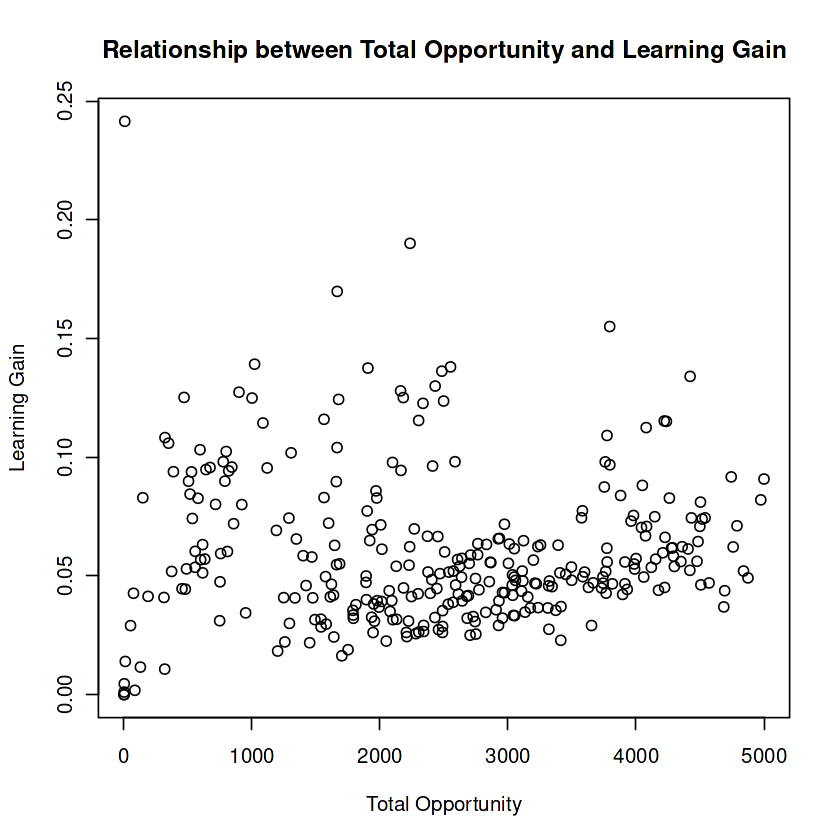

In [46]:
joined_data <- inner_join(PredictedScores, ds_predict2, by = "individual") %>% filter(total_opportunity <= 5000)
# Scatterplot
plot(joined_data$total_opportunity, joined_data$LearningGain, 
     xlab = "Total Opportunity", ylab = "Learning Gain", main = "Relationship between Total Opportunity and Learning Gain")

# Linear regression model
lm_model <- lm(LearningGain ~ total_opportunity, data = joined_data)

# Summary of the linear regression
summary(lm_model)

In [ ]:
# testScoresAll$int_iAFMProb = 1/(1+exp(-testScoresAll$int_iAFM))
# testScoresAll$PriorFinalGrade = testScoresAll$PriorFinalGrade/100
# testScoresAll$Q1Math = testScoresAll$Q1Math/100
# testScoresAll$Q2Math = testScoresAll$Q2Math/100
# testScoresAll$Q3Math = testScoresAll$Q3Math/100
# testScoresAll$Q4Math = testScoresAll$Q4Math/100
# testScoresAll$FinalMath = testScoresAll$FinalMath/100

In [ ]:
# testScoresAll_no_na <- na.omit(testScoresAll)

In [ ]:
# # RMSE of predAvgiAFM and math scores
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$PriorFinalGrade - testScoresAll_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q1Math - testScoresAll_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q2Math - testScoresAll_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q3Math - testScoresAll_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q4Math - testScoresAll_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$FinalMath - testScoresAll_no_na$PredAvgiAFM)^2)), 3)))

In [ ]:
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$PriorFinalGrade - testScoresAll_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q1Math - testScoresAll_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q2Math - testScoresAll_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q3Math - testScoresAll_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$Q4Math - testScoresAll_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_no_na$FinalMath - testScoresAll_no_na$int_iAFMProb)^2)), 3)))

In [ ]:
start.time <- Sys.time()

model_iafm_reverse = sample_data %>%
  glmer(response ~ opportunity_reverse + (opportunity_reverse|KC) + (opportunity_reverse|individual), 
        data=., family=binomial(), nAGQ = 0)

# fitting time of model
end.time <- Sys.time()
round(end.time - start.time,2)

In [ ]:
summ(model_iafm_reverse)

In [ ]:
saveRDS(model_iafm_reverse, file = "/kaggle/working/model_iafm_reverse.rds")

In [ ]:
StudentInterceptsiAFMReverse = data.frame(
  cbind(row.names(ranef(model_iafm_reverse)$individual), 
        ranef(model_iafm_reverse)$individual[,1]) 
)
colnames(StudentInterceptsiAFMReverse) = c("individual","int_iAFM_reverse")
StudentInterceptsiAFMReverse$int_iAFM_reverse = as.numeric(StudentInterceptsiAFMReverse$int_iAFM_reverse)++ as.numeric(coef(summary(model_iafm_reverse))[1])

In [ ]:
# ds_predict$pred_iafm_reverse = predict(model_iafm_reverse,ds_predict,type="response",allow.new.levels=TRUE)

In [ ]:
# PredictedScores = ds_predict %>% 
#   group_by(individual) %>%
#   summarise(
#     PredAvgiAFM = mean(pred_iafm),
#     PredAvgiAFMReverse = mean(pred_iafm_reverse)
#   )

In [ ]:
# testScoresAll %>%
#   chart.Correlation(histogram=TRUE)

In [ ]:
# write.csv(testScoresAll, file = "testScoresAll.csv")

In [ ]:
# testScoresAll$int_iAFM_reverse = as.numeric(testScoresAll$int_iAFM_reverse)

In [ ]:
# testScoresAll %>%
#   lm(PriorFinalGrade ~ int_iAFM_reverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(PriorFinalGrade ~ PredAvgiAFMReverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q1Math ~ int_iAFM_reverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q1Math ~ PredAvgiAFMReverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q2Math ~ int_iAFM_reverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q2Math ~ PredAvgiAFMReverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q3Math ~ int_iAFM_reverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q3Math ~ PredAvgiAFMReverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q4Math ~ int_iAFM_reverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(Q4Math ~ PredAvgiAFMReverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(FinalMath ~ int_iAFM_reverse, data = .) %>%
#   summ()
# testScoresAll %>%
#   lm(FinalMath ~ PredAvgiAFMReverse, data = .) %>%
#   summ()

In [ ]:
# testScoresAll %>%
#     lm(FinalMath ~ PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll %>%
#     lm(FinalMath ~ PredAvgiAFM + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll %>%
#     lm(FinalMath ~ int_iAFM + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll %>%
#     lm(FinalMath ~ int_iAFM_reverse + PriorFinalGrade, data = .) %>%
#     summ()

In [ ]:
# # 23fall: normalize initercepts and grades
# testScoresAll$int_iAFM <- scale(testScoresAll$int_iAFM)
# testScoresAll$int_iAFM_reverse <- scale(testScoresAll$int_iAFM_reverse)
# testScoresAll$PriorFinalGrade <- scale(testScoresAll$PriorFinalGrade)

# testScoresAll %>%
#     lm(FinalMath ~ PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll %>%
#     lm(FinalMath ~ PredAvgiAFM + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll %>%
#     lm(FinalMath ~ int_iAFM + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll %>%
#     lm(FinalMath ~ int_iAFM_reverse + PriorFinalGrade, data = .) %>%
#     summ()

In [ ]:
# testScoresAll_opp = testScoresAll %>%
#   left_join(ds_predict2, by="individual") 

In [ ]:
# testScoresAll_opp_no_na <- na.omit(testScoresAll_opp)

In [ ]:
# predict <- lm(FinalMath ~ int_iAFM + PriorFinalGrade, data = testScoresAll_opp_no_na)
# aic <- AIC(predict)
# bic <- BIC(predict)
# log_likelihood <- logLik(predict)
# print(aic)
# print(bic)
# print(log_likelihood)

In [ ]:
# testScoresAll_opp_no_na %>%
#     lm(FinalMath ~ PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll_opp_no_na %>%
#     lm(FinalMath ~ PredAvgiAFM + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll_opp_no_na %>%
#     lm(FinalMath ~ int_iAFM + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll_opp_no_na %>%
#     lm(FinalMath ~ int_iAFM_reverse + PriorFinalGrade, data = .) %>%
#     summ()

In [ ]:
# predict <- lm(FinalMath ~ int_iAFM_reverse + PriorFinalGrade , data = testScoresAll)
# aic <- AIC(predict)
# bic <- BIC(predict)
# log_likelihood <- logLik(predict)
# print(aic)
# print(bic)
# print(log_likelihood)

In [ ]:
# predict <- lm(FinalMath ~ int_iAFM_reverse + total_opportunity + PriorFinalGrade, data = testScoresAll_opp_no_na)
# aic <- AIC(predict)
# bic <- BIC(predict)
# log_likelihood <- logLik(predict)
# print(aic)
# print(bic)
# print(log_likelihood)

In [ ]:
# predWithOpp_new %>%
#     lm(difference ~ total_opportunity, data = .) %>%
#     summ()

In [ ]:
# testScoresAll_opp_no_na %>%
#     lm(FinalMath ~ PredAvgiAFM + total_opportunity + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll_opp_no_na %>%
#     lm(FinalMath ~ int_iAFM + total_opportunity + PriorFinalGrade, data = .) %>%
#     summ()

# testScoresAll_opp_no_na %>%
#     lm(FinalMath ~ int_iAFM_reverse + total_opportunity + PriorFinalGrade, data = .) %>%
#     summ()


In [ ]:
# testScoresAll_opp_no_na %>% select (PriorFinalGrade, Q1Math, Q2Math, Q3Math, Q4Math, FinalMath, int_iAFM, int_iAFM_reverse, PredAvgiAFM, PredAvgiAFMReverse, total_opportunity)%>%
#   chart.Correlation(histogram=TRUE)
# png("correlation_plot.png", width = 800, height = 800)
# dev.copy(png, "correlation_plot.png", width = 800, height = 800)
# dev.off()

In [ ]:
# test_data <- sample_data[sample(1:nrow(sample_data), 3000,
#    replace=FALSE),]

In [ ]:
# scores = read_csv(file="CognitiveTutorData2011-12_CarvalhoExport - CognitiveTutorData2011-12_CarvalhoExport.csv", col_names = TRUE)
# scores = scores %>%
#   select(ID, Teacher, PriorFinalGrade, Q1Math, Q2Math, Q3Math, Q4Math, FinalMath ) %>%
#   rename(individual = ID)

# test_data_join = test_data %>%
#   left_join(scores, by="individual") 




In [ ]:
# names(test_data_join)

In [ ]:
# model_iafm_withteacher = test_data_join %>%
#   glmer(response ~ opportunity0 + (opportunity0|KC) + (opportunity0|individual) + Teacher + (Teacher|individual), 
#         data=., family=binomial(), nAGQ = 0 )
# summ(model_iafm)

In [ ]:
# StudentInterceptsiAFM_withteacher = data.frame(
#   cbind(row.names(ranef(model_iafm_withteacher)$individual), 
#         ranef(model_iafm_withteacher)$individual[,1]) 
# )
# colnames(StudentInterceptsiAFM_withteacher) = c("individual","int_iAFM")
# StudentInterceptsiAFM_withteacher$int_iAFM = as.numeric(StudentInterceptsiAFM_withteacher$int_iAFM) + + as.numeric(coef(summary(model_iafm_withteacher))[1])

In [ ]:
# ds_predict_with_teacher = test_data_join %>%
#   group_by(individual, KC, Teacher) %>%
#   slice(which.max(opportunity0))

In [ ]:
# ds_predict_with_teacher_no_na <- ds_predict_with_teacher[!is.na(ds_predict_with_teacher$Teacher),]


In [ ]:
# ds_predict_with_teacher_no_na$pred_iafm = predict(model_iafm_withteacher,ds_predict_with_teacher_no_na,type="response",allow.new.levels=TRUE)

In [ ]:
# PredictedScores_with_teacher = ds_predict_with_teacher_no_na %>% 
#   group_by(individual) %>%
#   summarise(
#     PredAvgiAFM = mean(pred_iafm),
#   )

In [ ]:
# testScoresAll_with_teacher = test_data_join %>%
#   left_join(StudentInterceptsiAFM_withteacher, by="individual") %>%
#   left_join(PredictedScores_with_teacher, by="individual")
# testScoresAll_with_teacher$int_iAFM = as.numeric(testScoresAll_with_teacher$int_iAFM)

In [ ]:
# testScoresAll_with_teacher %>%
#   lm(PriorFinalGrade ~ int_iAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(PriorFinalGrade ~ PredAvgiAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q1Math ~ int_iAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q1Math ~ PredAvgiAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q2Math ~ int_iAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q2Math ~ PredAvgiAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q3Math ~ int_iAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q3Math ~ PredAvgiAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q4Math ~ int_iAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(Q4Math ~ PredAvgiAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(FinalMath ~ int_iAFM, data = .) %>%
#   summ()
# testScoresAll_with_teacher %>%
#   lm(FinalMath ~ PredAvgiAFM, data = .) %>%
#   summ()

In [ ]:
# testScoresAll_with_teacher$int_iAFMProb = 1/(1+exp(-testScoresAll_with_teacher$int_iAFM))
# testScoresAll_with_teacher$PriorFinalGrade = testScoresAll_with_teacher$PriorFinalGrade/100
# testScoresAll_with_teacher$Q1Math = testScoresAll_with_teacher$Q1Math/100
# testScoresAll_with_teacher$Q2Math = testScoresAll_with_teacher$Q2Math/100
# testScoresAll_with_teacher$Q3Math = testScoresAll_with_teacher$Q3Math/100
# testScoresAll_with_teacher$Q4Math = testScoresAll_with_teacher$Q4Math/100
# testScoresAll_with_teacher$FinalMath = testScoresAll_with_teacher$FinalMath/100

In [ ]:
# testScoresAll_with_teacher_no_na <- subset(testScoresAll_with_teacher, complete.cases(testScoresAll_with_teacher$PriorFinalGrade, testScoresAll_with_teacher$Q1Math, testScoresAll_with_teacher$Q2Math, testScoresAll_with_teacher$Q3Math, testScoresAll_with_teacher$Q4Math, testScoresAll_with_teacher$FinalMath, testScoresAll_with_teacher$int_iAFM, testScoresAll_with_teacher$PredAvgiAFM, testScoresAll_with_teacher$int_iAFMProb))


In [ ]:
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$PriorFinalGrade - testScoresAll_with_teacher_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q1Math - testScoresAll_with_teacher_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q2Math - testScoresAll_with_teacher_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q3Math - testScoresAll_with_teacher_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q4Math - testScoresAll_with_teacher_no_na$PredAvgiAFM)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$FinalMath - testScoresAll_with_teacher_no_na$PredAvgiAFM)^2)), 3)))

In [ ]:
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$PriorFinalGrade - testScoresAll_with_teacher_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q1Math - testScoresAll_with_teacher_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q2Math - testScoresAll_with_teacher_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q3Math - testScoresAll_with_teacher_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$Q4Math - testScoresAll_with_teacher_no_na$int_iAFMProb)^2)), 3)))
# print(paste0("iAFM: ", round(sqrt(mean((testScoresAll_with_teacher_no_na$FinalMath - testScoresAll_with_teacher_no_na$int_iAFMProb)^2)), 3)))

In [64]:
test_scores = joined_data %>% left_join(StudentInterceptsiAFM, by="individual")
test_scores$learning_gain = test_scores$int_iAFM_reverse - test_scores$int_iAFM

In [65]:
test_scores

individual,PredAvgiAFM,PredAvgiAFMReverse,LearningGain,LearningGainReverse,total_opportunity,int_iAFM,int_iAFM_reverse,learning_gain
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stu_0113m7,0.8224277,0.8615082,0.06136311,0.12535762,4407,1.7070556,2.550169,0.8431133
stu_03nig7,0.8147798,0.8594814,0.06485515,0.13006988,3122,1.5640231,2.452676,0.8886527
stu_05gygj,0.8096688,0.8539514,0.07087461,0.12321943,4499,1.6731734,2.483500,0.8103267
stu_09idnd,0.8338457,0.8920671,0.07437134,0.16231905,1290,1.6137653,2.484661,0.8708956
stu_0h52n5,0.8188979,0.8536065,0.06230419,0.12293493,2233,1.5952662,2.404742,0.8094759
stu_0o7dmu,0.8900974,0.9309624,0.03948909,0.07742747,2643,2.1273446,2.959014,0.8316691
stu_0pj6aw,0.8234351,0.8810814,0.07546820,0.15240179,3981,0.9684165,2.063205,1.0947887
stu_0swky2,0.8940262,0.9280030,0.03160337,0.08239553,1493,2.3084323,3.007137,0.6987050
stu_0swo65,0.9170039,0.9416674,0.02636121,0.05574048,2304,2.5139992,3.131315,0.6173161


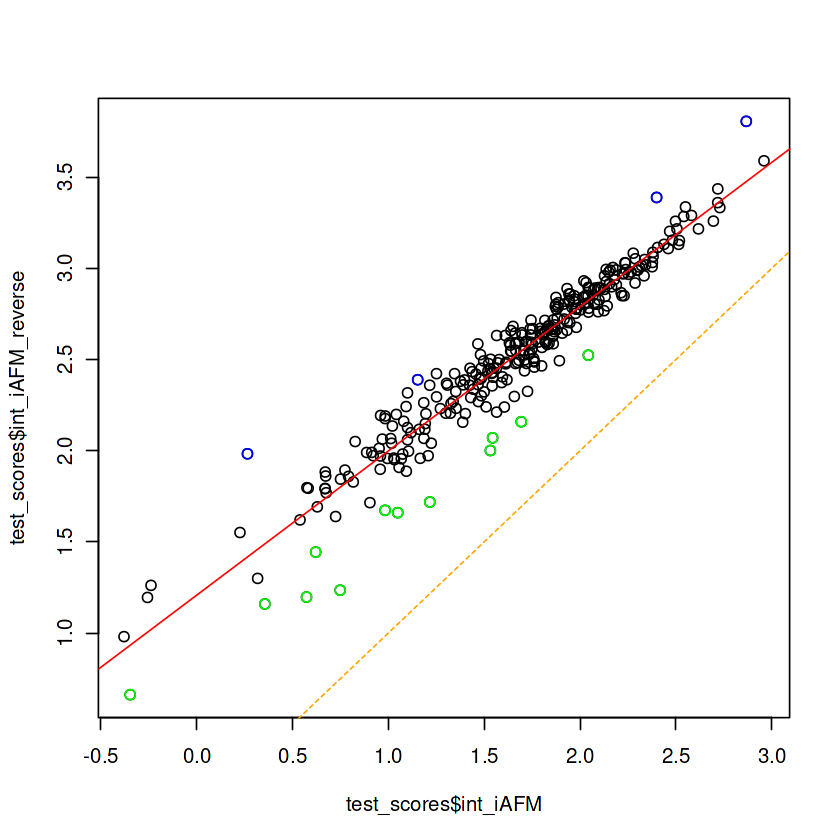

In [72]:
# Analysis of overachievers
linear_model <- lm(int_iAFM_reverse ~ int_iAFM, data = test_scores)

# Predict values using the linear model
predicted_values <- predict(linear_model, newdata = test_scores)

# Set a threshold
threshold_difference <- 0.25

# Calculate the difference between actual and predicted values
difference <- test_scores$int_iAFM_reverse - predicted_values

# Create a new column 'achiever_status'
test_scores$achiever_status <- ifelse(difference > threshold_difference, 1,
                                     ifelse(difference < -threshold_difference, -1, 0))

# Identify overachievers
overachievers <- which(test_scores$achiever_status == 1)
underachievers <- which(test_scores$achiever_status == -1)

# Extract overachiever cases
overachiever_cases <- test_scores[overachievers, ]
underachiever_cases <- test_scores[underachievers, ]

# Visualize results
plot(test_scores$int_iAFM, test_scores$int_iAFM_reverse)
abline(linear_model, col = "red")  # Line of best fit
points(overachiever_cases$int_iAFM, overachiever_cases$int_iAFM_reverse, col = "blue")
points(underachiever_cases$int_iAFM, underachiever_cases$int_iAFM_reverse, col = "green")
# abline(linear_model, col = "yellow")
abline(a = 0, b = 1, col = "orange", lty = 2)

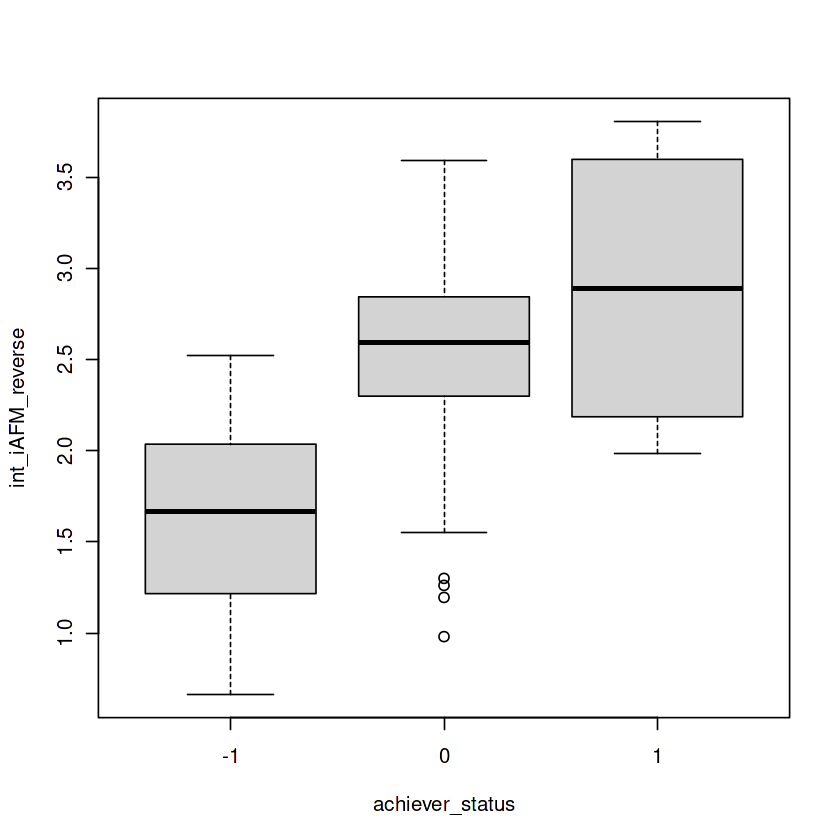

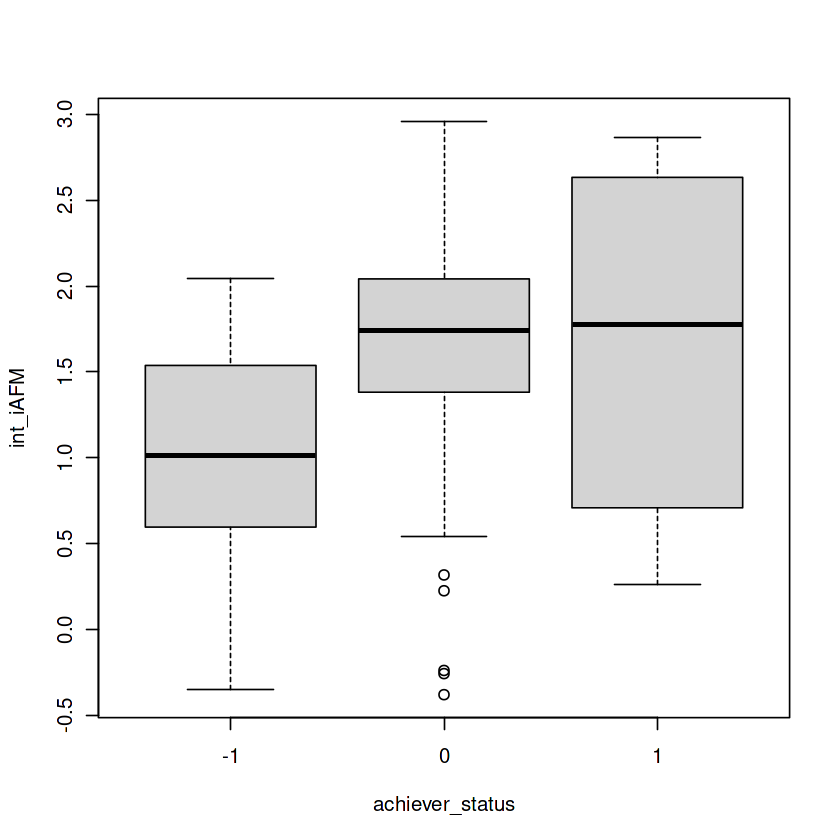

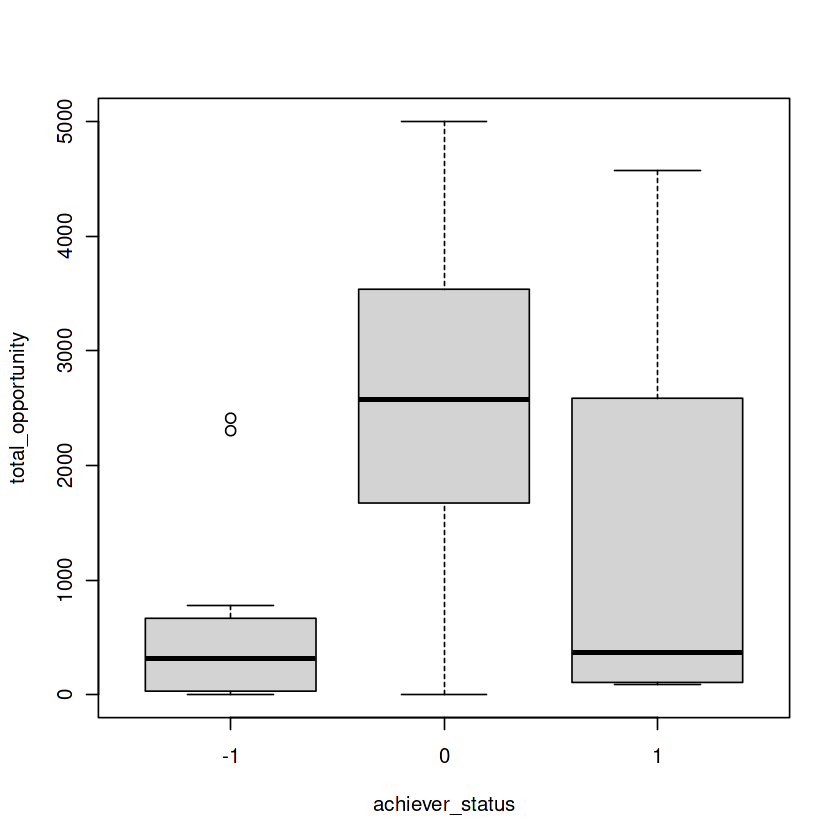

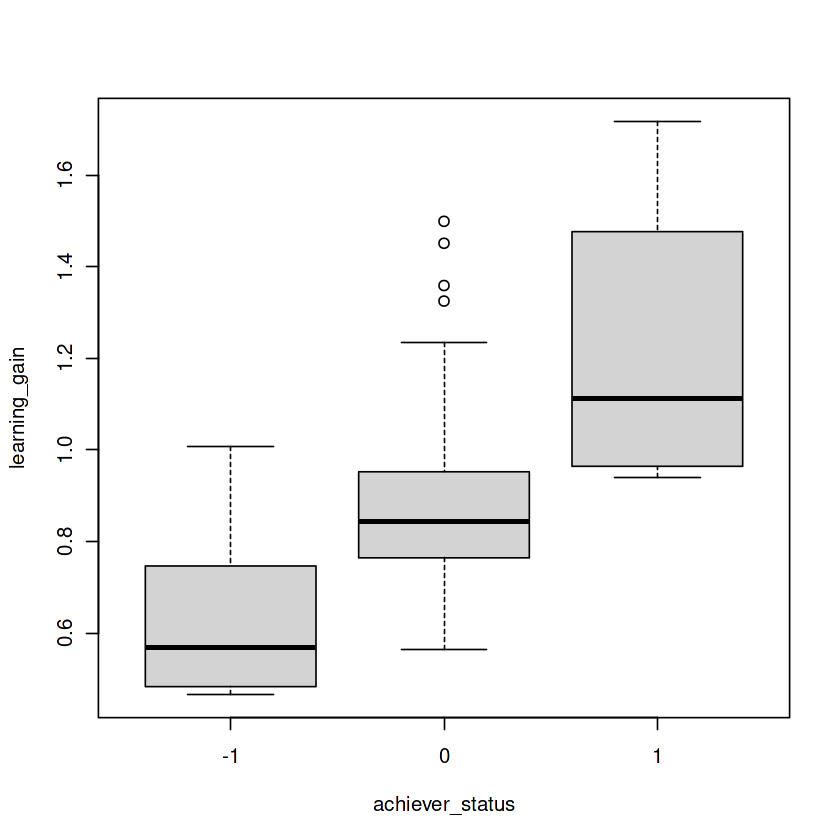

In [75]:
# Box plot for a specific variable
boxplot(int_iAFM_reverse ~ achiever_status, data = test_scores)
boxplot(int_iAFM ~ achiever_status, data = test_scores)
boxplot(total_opportunity ~ achiever_status, data = test_scores)
boxplot(learning_gain ~ achiever_status, data = test_scores)